In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Chickpea measurements.xlsx",sheet_name="sort_label3",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,T0_G0_1_13,T0_G0_1_25,T0_G0_1_25,T0_G0_1_13,T0_G0_1_24,T0_G0_1_20,T0_G0_1_30,T0_G0_2_30,T0_G0_2_25,T0_G0_2_33,...,T0_G0_2_40,T0_G0_2_32,T0_G0_2_32,T0_G0_3_30,T0_G0_3_25,T0_G0_3_24,T0_G0_3_32,T0_G0_3_24,T0_G0_3_46,T0_G0_3_25
1,T0_G0_4_15,T0_G0_4_20,T0_G0_4_25,T0_G0_4_20,T0_G0_4_20,T0_G0_4_10,T0_G0_4_22,T0_G0_5_37,T0_G0_5_35,T0_G0_5_22,...,T0_G0_5_15,T0_G0_5_30,T0_G0_5_40,T0_G0_6_22,T0_G0_6_28,T0_G0_6_26,T0_G0_6_34,T0_G0_6_22,T0_G0_6_20,T0_G0_6_30
2,T0_G0_7_24,T0_G0_7_32,T0_G0_7_34,T0_G0_7_15_C,T0_G0_7_21,T0_G0_7_28,T0_G0_7_11,T0_G0_8_25,T0_G0_8_32,T0_G0_8_21,...,T0_G0_8_36,T0_G0_8_35,T0_G0_8_40,T0_G0_9_27,T0_G0_9_28,T0_G0_9_34,T0_G0_9_40_C,T0_G0_9_33,T0_G0_9_42,T0_G0_9_45
3,T0_G0_10_25,T0_G0_10_6,T0_G0_10_40,T0_G0_10_25,T0_G0_10_25,T0_G0_10_35,T0_G0_10_20,T0_G0_11_30,T0_G0_11_22,T0_G0_11_18,...,T0_G0_11_25,T0_G0_11_30,T0_G0_11_20,T0_G0_12_18,T0_G0_12_25,T0_G0_12_13_C,T0_G0_12_4,T0_G0_12_13,T0_G0_12_0,T0_G0_12_0
4,T0_G0_13_30,T0_G0_13_28,T0_G0_13_35,T0_G0_13_34,T0_G0_13_18,T0_G0_13_35,T0_G0_13_30,T0_G0_14_25,T0_G0_14_23,T0_G0_14_24,...,T0_G0_14_14,T0_G0_14_15_C,T0_G0_14_20,T0_G0_15_22,T0_G0_15_16,T0_G0_15_16,T0_G0_15_10,T0_G0_15_11,T0_G0_15_20_C,T0_G0_15_14


In [3]:
df_one = df.stack().reset_index()
df_one.head()

,level_0,level_1,0
0,0,0,T0_G0_1_13
1,0,1,T0_G0_1_25
2,0,2,T0_G0_1_25
3,0,3,T0_G0_1_13
4,0,4,T0_G0_1_24


In [4]:
## get data column into a new dataframe df1
df1 = df_one[[0]]
df1.columns = ["merged"]
# Split single column into multiple columns
#df1[['treatment', 'group','line_num','length','notes']] = df1[0].apply(lambda x: pd.Series(str(x).split("_")))
df1[["treatment",'group','line_num','root_length']]=df1["merged"].str.split("_", expand=True)[[0,1,2,3]]

/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [5]:
## replace missing value m as 0
df1.replace({"m":0},inplace=True)
##count how many 0
df1["root_length"].value_counts()

0      1988
30      420
25      416
20      383
35      355
       ... 
263       1
210       1
242       1
237       1
225       1
Name: root_length, Length: 226, dtype: int64

In [6]:
## convert string to integar dtype
df1["root_length"] = df1["root_length"].astype(int)

In [7]:
## drop 0 missing values
df2= df1[df1['root_length'] != 0][['treatment', 'group', 'line_num', 'root_length']]
df2.head()

,treatment,group,line_num,root_length
0,T0,G0,1,13
1,T0,G0,1,25
2,T0,G0,1,25
3,T0,G0,1,13
4,T0,G0,1,24


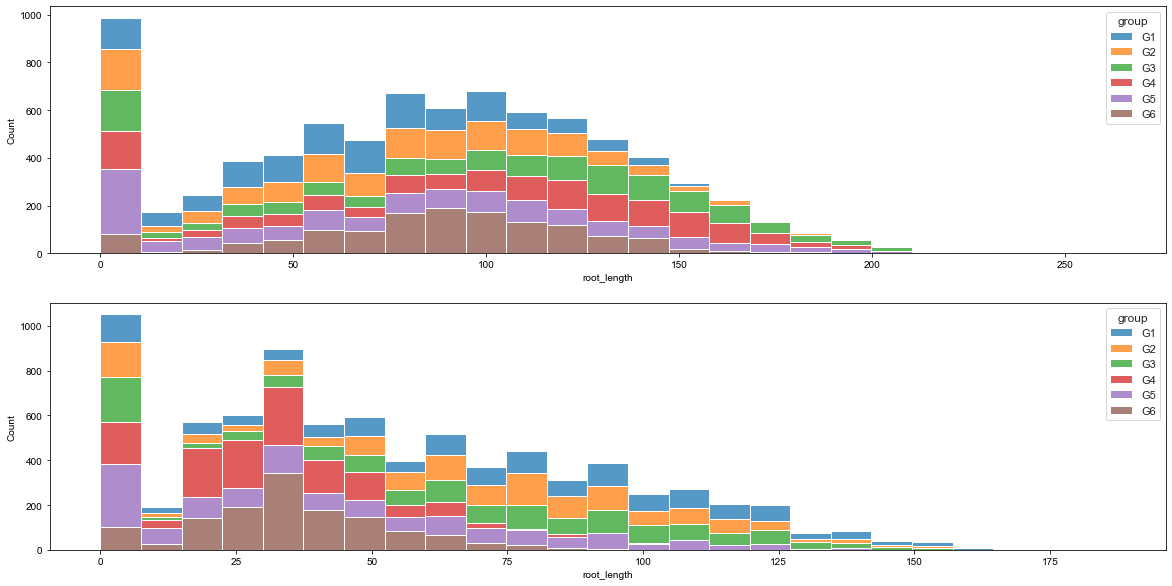

In [8]:
fig0,ax=plt.subplots(2,1,figsize=(20,10))
## for each group and treatment, plot the value distribution
sns.set_theme(style="white", palette=None)
# Draw a stacked histogram
df_tem=df1[df1["group"] != "G0"]
sns.histplot(ax=ax[0],data=df_tem[df_tem["treatment"] == "T0"], x="root_length", hue="group", multiple="stack",bins=25)
sns.histplot(ax=ax[1],data=df_tem[df_tem["treatment"] == "T1"], x="root_length", hue="group", multiple="stack",bins=25)

# ax.legend(title="Treatment",fontsize=15)
# ax.set_xlabel("Group",fontsize=20)
# ax.set_ylabel("Root length (mm)",fontsize=20)
plt.show()

In [9]:
## get top 3 values for each line, use data before droping 0
df3 = df1[["treatment","group","line_num","root_length"]]
df3 = df3.groupby(["treatment","group","line_num"])["root_length"].nlargest(3).reset_index(level=3,drop=True).reset_index()
df3.head()

,treatment,group,line_num,root_length
0,T0,G0,1,30
1,T0,G0,1,25
2,T0,G0,1,25
3,T0,G0,10,40
4,T0,G0,10,35


In [10]:
## drop 0 to avoid impact on root tolerance index calculation
df4 = df3[df3["root_length"] != 0]
## calculate average value for each line
#df4.groupby(["treatment","group","line_num"]).describe()
df4 = df4.groupby(["treatment","group","line_num"]).agg(["mean","std","count"]).reset_index()
df4.head()

treatment group line_num root_length                
                                  mean       std count
0        T0    G0        1   26.666667  2.886751     3
1        T0    G0       10   33.333333  7.637626     3
2        T0    G0      100   30.666667  4.041452     3
3        T0    G0      101   26.666667  1.154701     3
4        T0    G0      102   32.000000  7.000000     3

In [11]:
## calculate RTI
#separate T0 T1
dft0 = df4[df4["treatment"] == "T0"]
dft1 = df4[df4["treatment"] == "T1"]

In [12]:
# merged based on group and line_num
df5 = dft0.merge(dft1,how="left",left_on=['group','line_num'],right_on=['group','line_num'])
df5.columns=['treatID0','group','line_num','mean_T0','std_T0','count_T0','treatID1','mean_T1','std_T1','count_T1']
df5=df5[['group','line_num','mean_T0','std_T0','count_T0','mean_T1','std_T1','count_T1']]
df5.head()

/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,group,line_num,mean_T0,std_T0,count_T0,mean_T1,std_T1,count_T1
0,G0,1,26.666667,2.886751,3,29.000000,1.732051,3.0
1,G0,10,33.333333,7.637626,3,31.333333,3.055050,3.0
2,G0,100,30.666667,4.041452,3,26.666667,7.637626,3.0
3,G0,101,26.666667,1.154701,3,33.333333,4.618802,3.0
4,G0,102,32.000000,7.000000,3,22.333333,6.429101,3.0


In [13]:
## calculate RTI
df5["RTI"] = df5['mean_T1']/df5['mean_T0']
df5.head()

,group,line_num,mean_T0,std_T0,count_T0,mean_T1,std_T1,count_T1,RTI
0,G0,1,26.666667,2.886751,3,29.000000,1.732051,3.0,1.087500
1,G0,10,33.333333,7.637626,3,31.333333,3.055050,3.0,0.940000
2,G0,100,30.666667,4.041452,3,26.666667,7.637626,3.0,0.869565
3,G0,101,26.666667,1.154701,3,33.333333,4.618802,3.0,1.250000
4,G0,102,32.000000,7.000000,3,22.333333,6.429101,3.0,0.697917


In [14]:
##add label column
df5['label'] = df5['group'] + '_' + df5['line_num']

/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


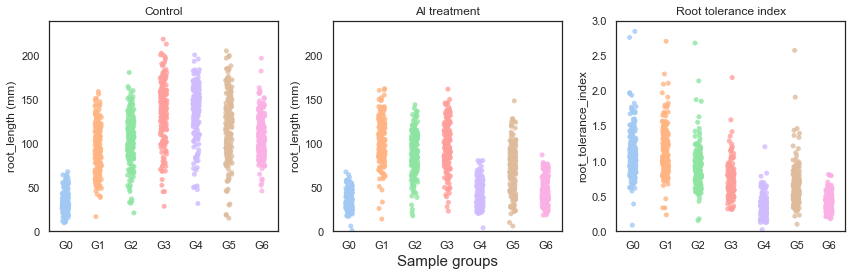

In [15]:
fig,ax=plt.subplots(1,3,figsize=(12,4),sharex=True)
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.stripplot(ax=ax[0],x="group", y="mean_T0", data=df5, alpha=.8, zorder=1)
sns.stripplot(ax=ax[1],x="group", y="mean_T1", data=df5,alpha=.8, zorder=1)
sns.stripplot(ax=ax[2],x="group", y="RTI", data=df5,alpha=.8, zorder=1)
ax[0].set_title("Control",fontsize=12)
ax[0].set_ylim(0,240)
ax[0].set_ylabel("root_length (mm)")
ax[0].set_xlabel("")

ax[1].set_title("Al treatment",fontsize=12)
ax[1].set_ylim(0,240)
ax[1].set_ylabel("root_length (mm)")
ax[1].set_xlabel("Sample groups",fontsize=15)

ax[2].set_title("Root tolerance index",fontsize=12)
ax[2].set_ylabel("root_tolerance_index")
ax[2].set_xlabel("")
ax[2].set_ylim(0,3)
#ax.imshow(z, aspect="auto")
fig.tight_layout()
fig.show()

## match group number with accession IDs

In [16]:
dfID = pd.read_excel("Northam Chickpeas Hydroponic ID processing.xlsx",sheet_name="clean",header=0)
dfID.head()

,Group,Num,ID,Category
0,G1,1,33005,HTRCxCDB22C
1,G1,2,33003,HTRCxCDB22C
2,G1,3,34007,HTRCxCDB22C
3,G1,4,33002,HTRCxCDB22C
4,G1,5,33001,HTRCxCDB22C


In [17]:
df5.head()

,group,line_num,mean_T0,std_T0,count_T0,mean_T1,std_T1,count_T1,RTI,label
0,G0,1,26.666667,2.886751,3,29.000000,1.732051,3.0,1.087500,G0_1
1,G0,10,33.333333,7.637626,3,31.333333,3.055050,3.0,0.940000,G0_10
2,G0,100,30.666667,4.041452,3,26.666667,7.637626,3.0,0.869565,G0_100
3,G0,101,26.666667,1.154701,3,33.333333,4.618802,3.0,1.250000,G0_101
4,G0,102,32.000000,7.000000,3,22.333333,6.429101,3.0,0.697917,G0_102


In [18]:
## change int to string object type
dfID['Num'] = dfID['Num'].apply(str)

In [19]:
dfmerged = df5.merge(dfID,how="left",left_on=['group','line_num'],right_on=['Group','Num'])
dfmerged.head()

,group,line_num,mean_T0,std_T0,count_T0,mean_T1,std_T1,count_T1,RTI,label,Group,Num,ID,Category
0,G0,1,26.666667,2.886751,3,29.000000,1.732051,3.0,1.087500,G0_1,NaN,NaN,NaN,NaN
1,G0,10,33.333333,7.637626,3,31.333333,3.055050,3.0,0.940000,G0_10,NaN,NaN,NaN,NaN
2,G0,100,30.666667,4.041452,3,26.666667,7.637626,3.0,0.869565,G0_100,NaN,NaN,NaN,NaN
3,G0,101,26.666667,1.154701,3,33.333333,4.618802,3.0,1.250000,G0_101,NaN,NaN,NaN,NaN
4,G0,102,32.000000,7.000000,3,22.333333,6.429101,3.0,0.697917,G0_102,NaN,NaN,NaN,NaN


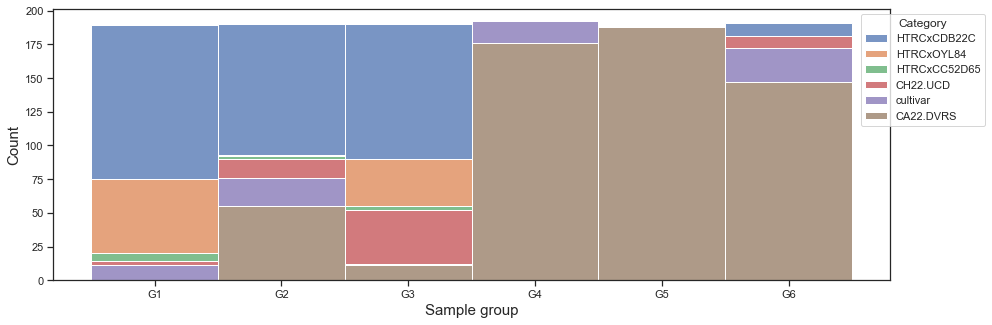

In [20]:
## display the line category in each group

fig,ax=plt.subplots(1,1,figsize=(15,5))
## for each group and treatment, plot the value distribution
sns.set_theme()
sns.set_theme(style="white", palette=None)
# Draw a stacked histogram
df_tem=dfmerged[dfmerged["group"] != "G0"]
g = sns.histplot(data=df_tem, x="group", hue="Category", multiple="stack",legend=True)
sns.move_legend(g, "upper right",bbox_to_anchor=(1.12,1))
ax.set_xlabel("Sample group",fontsize=15)
ax.set_ylabel("Count",fontsize=15)

plt.show()

In [21]:
dfmerged["Cultivar_color"] = np.where(dfmerged['Category'] == "cultivar", "red", "lightgrey")

IndexError: list index out of range

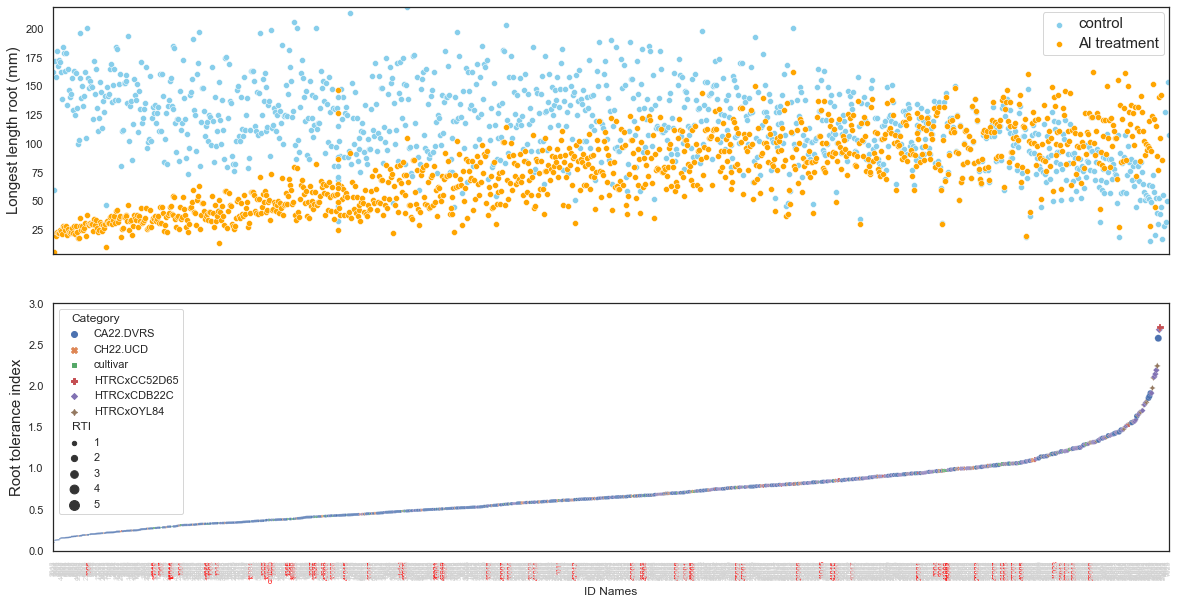

In [23]:
## plot RTI and differentiate different populations
import matplotlib.patches as mpatches
sns.set_theme(style="white")
fig,ax=plt.subplots(2,1,figsize=(20,10),sharex=True)

# Reorder it following the values of the first value:
ordered_df = dfmerged[dfmerged['group'] != 'G0'].sort_values(by='RTI')
ordered_df["ID"] = ordered_df["ID"].astype('str')
my_range=range(1,len(dfmerged.index)+1)
 
# The horizontal plot is made using the hline function
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

cc0=ordered_df["mean_T0"].values
sns.scatterplot(ax=ax[0], y="mean_T0", x="ID", data=ordered_df,
            label="control",color='skyblue')
cc1=ordered_df['mean_T1'].values
sns.scatterplot(ax=ax[0], y="mean_T1", x="ID", data=ordered_df,
            label="Al treatment",color='orange')
plt.setp(ax[0].get_legend().get_texts(), fontsize='15') # for legend text

sns.scatterplot(ax=ax[1], data=ordered_df,x="ID", y="RTI", hue="Category", size="RTI",sizes=(0,100),\
               legend=True, style='Category', palette='deep')
 
# Range and margins
ax[0].margins(0,0)
ax[1].margins(0,0)
#ax[0].set(ylim=(20, 160))
ax[1].set(ylim=(0, 3))

#labels
ax[0].set_ylabel("Longest length root (mm)",fontsize=15)
ax[0].set_xlabel("")
ax[1].set_ylabel("Root tolerance index",fontsize=15)
ax[1].set_xlabel("ID Names")
plt.setp(ax[1].get_xticklabels(), fontsize=7,rotation=90)

#xticklabels color
colors=ordered_df.Cultivar_color.to_list()
for i in np.arange(0,1148):
    color=colors[i]
    t=ax[1].xaxis.get_ticklabels()[i]
    t.set_color(color)

plt.subplots_adjust(hspace=0.02)
# Show the graph
plt.show()

In [325]:
ordered_df.shape

(1148, 15)

In [334]:
fig.savefig("Distribution_RTI_highlight_cultivar_ID.png",dpi=300,bbox_inches = 'tight')

/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  """Entry point for launching an IPython kernel.
/opt/an

In [335]:
## merge data with AGGid
dfAGG = pd.read_excel("Northam Chickpeas Hydroponic ID processing.xlsx",sheet_name="plotID_AGGid",header=0)
dfAGG.head()

,BcodeString,Plot
0,AGG48812CHIC4,13032
1,AGG48813CHIC4,14001
2,AGG48816CHIC4,14002
3,AGG48817CHIC4,14003
4,AGG48818CHIC4,14004


In [340]:
dfmerged2 = df3.merge(dfID,how="left",left_on=['group','line_num'],right_on=['Group','Num'])
dfmerged2 = dfmerged2[dfmerged2["group"] != 'G0']
dfmerged2.head()

,treatment,group,line_num,root_length,Group,Num,ID,Category
576,T0,G1,1,77,G1,1,33005,HTRCxCDB22C
577,T0,G1,1,73,G1,1,33005,HTRCxCDB22C
578,T0,G1,1,60,G1,1,33005,HTRCxCDB22C
579,T0,G1,10,104,G1,10,33010,HTRCxCDB22C
580,T0,G1,10,99,G1,10,33010,HTRCxCDB22C


In [341]:
dfAGG.head()

,BcodeString,Plot
0,AGG48812CHIC4,13032
1,AGG48813CHIC4,14001
2,AGG48816CHIC4,14002
3,AGG48817CHIC4,14003
4,AGG48818CHIC4,14004


In [342]:
df_final = dfmerged2.merge(dfAGG,how='left',left_on='ID',right_on='Plot')
df_final.head()

,treatment,group,line_num,root_length,Group,Num,ID,Category,BcodeString,Plot
0,T0,G1,1,77,G1,1,33005,HTRCxCDB22C,1004999,33005.0
1,T0,G1,1,73,G1,1,33005,HTRCxCDB22C,1004999,33005.0
2,T0,G1,1,60,G1,1,33005,HTRCxCDB22C,1004999,33005.0
3,T0,G1,10,104,G1,10,33010,HTRCxCDB22C,1005005,33010.0
4,T0,G1,10,99,G1,10,33010,HTRCxCDB22C,1005005,33010.0


In [343]:
df_final.to_excel("Appendix_A.xlsx")